In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import glob
import os
import re
import gc
from scipy import stats
import statsmodels.stats.multitest as smm

In [2]:
path = "path/to/files/"
all_filesFBD4 = glob.glob(path + "/*_FBD4.out")
all_filesFBD3 = glob.glob(path + "/*_FBD3.out")
all_filesFBD = glob.glob(path + "/*FBD.out")
all_filesFBD2 = glob.glob(path + "/*FBD2.out")

all_filesNBD = glob.glob(path + "/*NBD.out")

all_filesMBD = glob.glob(path + "/*MBD.out")
all_filesMBD2 = glob.glob(path + "/*MBD2.out")
all_filesMBD3 = glob.glob(path + "/*_MBD3.out")
all_filesMBD4 = glob.glob(path + "/*_MBD4.out")

,Generation,Distance,Nuclear,Mitochondrial
2474995,100000,0.580504,998,102
2474996,100000,0.607116,979,107
2474997,100000,0.545330,893,103
2474998,100000,0.148922,637,108
2474999,100000,0.693059,912,103


In [4]:
file_listFBD4 = []

for file in all_filesFBD4:
    dfFBD4=pd.read_csv(file, sep="\t",index_col=False)
    file_listFBD4.append(dfFBD4)

Gen = list(range(0, 200000, 200))
def prepare_data(dfFBD4, Gen):
    dfFBD4_filtered=dfFBD4[dfFBD4["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfFBD4_agg = dfFBD4_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfFBD4_agg['Distance_array'] = dfFBD4_agg['Distance'].apply(lambda x: np.asarray(x))
    dfFBD4_agg['Nuclear_array'] = dfFBD4_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfFBD4_agg['Mitochondrial_array'] = dfFBD4_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfFBD4_agg['corr_Distance_Nuclear'] = dfFBD4_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfFBD4_agg['corr_Distance_Mitochondrial'] = dfFBD4_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfFBD4_agg['corr_Mitochondrial_Nuclear'] = dfFBD4_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfFBD4_agg

list_dfFBD4_agg = []

for file in file_listFBD4:
    dfFBD4_agg = prepare_data(file, Gen)
    list_dfFBD4_agg.append(dfFBD4_agg)
    
result = pd.concat(list_dfFBD4_agg)

new_dfFBD4 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfFBD4_3 = pd.melt(new_dfFBD4, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfFBD4_3.to_csv('FBD4.csv', index=False)

del file
del file_listFBD4
del dfFBD4
del dfFBD4_agg
del list_dfFBD4_agg
del result
del new_dfFBD4
del dfFBD4_3

In [5]:
file_listFBD3 = []

for file in all_filesFBD3:
    dfFBD3=pd.read_csv(file, sep="\t",index_col=False)
    file_listFBD3.append(dfFBD3)

Gen = list(range(0, 200000, 200))
def prepare_data(dfFBD3, Gen):
    dfFBD3_filtered=dfFBD3[dfFBD3["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfFBD3_agg = dfFBD3_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfFBD3_agg['Distance_array'] = dfFBD3_agg['Distance'].apply(lambda x: np.asarray(x))
    dfFBD3_agg['Nuclear_array'] = dfFBD3_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfFBD3_agg['Mitochondrial_array'] = dfFBD3_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfFBD3_agg['corr_Distance_Nuclear'] = dfFBD3_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfFBD3_agg['corr_Distance_Mitochondrial'] = dfFBD3_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfFBD3_agg['corr_Mitochondrial_Nuclear'] = dfFBD3_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfFBD3_agg

list_dfFBD3_agg = []

for file in file_listFBD3:
    dfFBD3_agg = prepare_data(file, Gen)
    list_dfFBD3_agg.append(dfFBD3_agg)
    
result = pd.concat(list_dfFBD3_agg)

new_dfFBD3 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfFBD3_3 = pd.melt(new_dfFBD3, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfFBD3_3.to_csv('FBD3.csv', index=False)

del file
del file_listFBD3
del dfFBD3
del dfFBD3_agg
del list_dfFBD3_agg
del result
del new_dfFBD3
del dfFBD3_3

In [6]:
file_listFBD2 = []

for file in all_filesFBD2:
    dfFBD2=pd.read_csv(file, sep="\t",index_col=False)
    file_listFBD2.append(dfFBD2)

Gen = list(range(0, 200000, 200))
def prepare_data(dfFBD2, Gen):
    dfFBD2_filtered=dfFBD2[dfFBD2["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfFBD2_agg = dfFBD2_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfFBD2_agg['Distance_array'] = dfFBD2_agg['Distance'].apply(lambda x: np.asarray(x))
    dfFBD2_agg['Nuclear_array'] = dfFBD2_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfFBD2_agg['Mitochondrial_array'] = dfFBD2_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfFBD2_agg['corr_Distance_Nuclear'] = dfFBD2_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfFBD2_agg['corr_Distance_Mitochondrial'] = dfFBD2_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfFBD2_agg['corr_Mitochondrial_Nuclear'] = dfFBD2_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfFBD2_agg

list_dfFBD2_agg = []

for file in file_listFBD2:
    dfFBD2_agg = prepare_data(file, Gen)
    list_dfFBD2_agg.append(dfFBD2_agg)
    
result = pd.concat(list_dfFBD2_agg)

new_dfFBD2 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfFBD2_3 = pd.melt(new_dfFBD2, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfFBD2_3.to_csv('FBD2.csv', index=False)

del file
del file_listFBD2
del dfFBD2
del dfFBD2_agg
del list_dfFBD2_agg
del result
del new_dfFBD2
del dfFBD2_3

In [7]:
file_listFBD = []

for file in all_filesFBD:
    dfFBD=pd.read_csv(file, sep="\t",index_col=False)
    file_listFBD.append(dfFBD)

Gen = list(range(0, 200000, 200))
def prepare_data(dfFBD, Gen):
    dfFBD_filtered=dfFBD[dfFBD["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfFBD_agg = dfFBD_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfFBD_agg['Distance_array'] = dfFBD_agg['Distance'].apply(lambda x: np.asarray(x))
    dfFBD_agg['Nuclear_array'] = dfFBD_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfFBD_agg['Mitochondrial_array'] = dfFBD_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfFBD_agg['corr_Distance_Nuclear'] = dfFBD_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfFBD_agg['corr_Distance_Mitochondrial'] = dfFBD_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfFBD_agg['corr_Mitochondrial_Nuclear'] = dfFBD_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfFBD_agg

list_dfFBD_agg = []

for file in file_listFBD:
    dfFBD_agg = prepare_data(file, Gen)
    list_dfFBD_agg.append(dfFBD_agg)
    
result = pd.concat(list_dfFBD_agg)

new_dfFBD = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfFBD_3 = pd.melt(new_dfFBD, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfFBD_3.to_csv('FBD.csv', index=False)

del file
del file_listFBD
del dfFBD
del dfFBD_agg
del list_dfFBD_agg
del result
del new_dfFBD
del dfFBD_3

In [8]:
file_listNDB = []

for file in all_filesNDB:
    dfNDB=pd.read_csv(file, sep="\t",index_col=False)
    file_listNDB.append(dfNDB)

Gen = list(range(0, 200000, 200))
def prepare_data(dfNDB, Gen):
    dfNDB_filtered=dfNDB[dfNDB["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfNDB_agg = dfNDB_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfNDB_agg['Distance_array'] = dfNDB_agg['Distance'].apply(lambda x: np.asarray(x))
    dfNDB_agg['Nuclear_array'] = dfNDB_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfNDB_agg['Mitochondrial_array'] = dfNDB_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfNDB_agg['corr_Distance_Nuclear'] = dfNDB_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfNDB_agg['corr_Distance_Mitochondrial'] = dfNDB_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfNDB_agg['corr_Mitochondrial_Nuclear'] = dfNDB_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfNDB_agg

list_dfNDB_agg = []

for file in file_listNDB:
    dfNDB_agg = prepare_data(file, Gen)
    list_dfNDB_agg.append(dfNDB_agg)
    
result = pd.concat(list_dfNDB_agg)

new_dfNDB = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfNDB_3 = pd.melt(new_dfNDB, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfNDB_3.to_csv('NDB.csv', index=False)

del file
del file_listNDB
del dfNDB
del dfNDB_agg
del list_dfNDB_agg
del result
del new_dfNDB
del dfNDB_3

In [9]:
file_listMBD = []

for file in all_filesMBD:
    dfMBD=pd.read_csv(file, sep="\t",index_col=False)
    file_listMBD.append(dfMBD)

Gen = list(range(0, 200000, 200))
def prepare_data(dfMBD, Gen):
    dfMBD_filtered=dfMBD[dfMBD["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfMBD_agg = dfMBD_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfMBD_agg['Distance_array'] = dfMBD_agg['Distance'].apply(lambda x: np.asarray(x))
    dfMBD_agg['Nuclear_array'] = dfMBD_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfMBD_agg['Mitochondrial_array'] = dfMBD_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfMBD_agg['corr_Distance_Nuclear'] = dfMBD_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfMBD_agg['corr_Distance_Mitochondrial'] = dfMBD_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfMBD_agg['corr_Mitochondrial_Nuclear'] = dfMBD_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfMBD_agg

list_dfMBD_agg = []

for file in file_listMBD:
    dfMBD_agg = prepare_data(file, Gen)
    list_dfMBD_agg.append(dfMBD_agg)
    
result = pd.concat(list_dfMBD_agg)

new_dfMBD = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfMBD_3 = pd.melt(new_dfMBD, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfMBD_3.to_csv('MBD.csv', index=False)


del file
del file_listMBD
del dfMBD
del dfMBD_agg
del list_dfMBD_agg
del result
del new_dfMBD
del dfMBD_3

In [10]:
file_listMBD2 = []

for file in all_filesMBD2:
    dfMBD2=pd.read_csv(file, sep="\t",index_col=False)
    file_listMBD2.append(dfMBD2)

Gen = list(range(0, 200000, 200))
def prepare_data(dfMBD2, Gen):
    dfMBD2_filtered=dfMBD2[dfMBD2["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfMBD2_agg = dfMBD2_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfMBD2_agg['Distance_array'] = dfMBD2_agg['Distance'].apply(lambda x: np.asarray(x))
    dfMBD2_agg['Nuclear_array'] = dfMBD2_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfMBD2_agg['Mitochondrial_array'] = dfMBD2_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfMBD2_agg['corr_Distance_Nuclear'] = dfMBD2_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfMBD2_agg['corr_Distance_Mitochondrial'] = dfMBD2_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfMBD2_agg['corr_Mitochondrial_Nuclear'] = dfMBD2_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfMBD2_agg

list_dfMBD2_agg = []

for file in file_listMBD2:
    dfMBD2_agg = prepare_data(file, Gen)
    list_dfMBD2_agg.append(dfMBD2_agg)
    
result = pd.concat(list_dfMBD2_agg)

new_dfMBD2 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfMBD2_3 = pd.melt(new_dfMBD2, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfMBD2_3.to_csv('MBD2.csv', index=False)

del file
del file_listMBD2
del dfMBD2
del dfMBD2_agg
del list_dfMBD2_agg
del result
del new_dfMBD2
del dfMBD2_3

In [11]:
file_listMBD3 = []

for file in all_filesMBD3:
    dfMBD3=pd.read_csv(file, sep="\t",index_col=False)
    file_listMBD3.append(dfMBD3)

Gen = list(range(0, 200000, 200))
def prepare_data(dfMBD3, Gen):
    dfMBD3_filtered=dfMBD3[dfMBD3["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfMBD3_agg = dfMBD3_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfMBD3_agg['Distance_array'] = dfMBD3_agg['Distance'].apply(lambda x: np.asarray(x))
    dfMBD3_agg['Nuclear_array'] = dfMBD3_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfMBD3_agg['Mitochondrial_array'] = dfMBD3_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfMBD3_agg['corr_Distance_Nuclear'] = dfMBD3_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfMBD3_agg['corr_Distance_Mitochondrial'] = dfMBD3_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfMBD3_agg['corr_Mitochondrial_Nuclear'] = dfMBD3_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfMBD3_agg

list_dfMBD3_agg = []

for file in file_listMBD3:
    dfMBD3_agg = prepare_data(file, Gen)
    list_dfMBD3_agg.append(dfMBD3_agg)
    
result = pd.concat(list_dfMBD3_agg)

new_dfMBD3 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfMBD3_3 = pd.melt(new_dfMBD3, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfMBD3_3.to_csv('MBD3.csv', index=False)


del file
del file_listMBD3
del dfMBD3
del dfMBD3_agg
del list_dfMBD3_agg
del result
del new_dfMBD3
del dfMBD3_3

In [12]:
file_listMBD4 = []

for file in all_filesMBD4:
    dfMBD4=pd.read_csv(file, sep="\t",index_col=False)
    file_listMBD4.append(dfMBD4)

Gen = list(range(0, 200000, 200))
def prepare_data(dfMBD4, Gen):
    dfMBD4_filtered=dfMBD4[dfMBD4["Generation"].isin(Gen)][["Generation", "Distance", "Nuclear", "Mitochondrial"]]
    dfMBD4_agg = dfMBD4_filtered.groupby("Generation", as_index= False).agg(lambda x: list(x))
    dfMBD4_agg['Distance_array'] = dfMBD4_agg['Distance'].apply(lambda x: np.asarray(x))
    dfMBD4_agg['Nuclear_array'] = dfMBD4_agg['Nuclear'].apply(lambda x: np.asarray(x))
    dfMBD4_agg['Mitochondrial_array'] = dfMBD4_agg['Mitochondrial'].apply(lambda x: np.asarray(x))
    dfMBD4_agg['corr_Distance_Nuclear'] = dfMBD4_agg[['Distance', 'Nuclear']].apply(lambda x: np.corrcoef(x['Distance'], x['Nuclear'])[0,1], axis=1)
    dfMBD4_agg['corr_Distance_Mitochondrial'] = dfMBD4_agg[['Distance', 'Mitochondrial']].apply(lambda x: np.corrcoef(x['Distance'], x['Mitochondrial'])[0,1], axis=1)
    dfMBD4_agg['corr_Mitochondrial_Nuclear'] = dfMBD4_agg[['Mitochondrial', 'Nuclear']].apply(lambda x: np.corrcoef(x['Mitochondrial'], x['Nuclear'])[0,1], axis=1)
    
    return dfMBD4_agg

list_dfMBD4_agg = []

for file in file_listMBD4:
    dfMBD4_agg = prepare_data(file, Gen)
    list_dfMBD4_agg.append(dfMBD4_agg)
    
result = pd.concat(list_dfMBD4_agg)

new_dfMBD4 = result[['Generation', 'corr_Distance_Nuclear', 'corr_Distance_Mitochondrial', 'corr_Mitochondrial_Nuclear']]

dfMBD4_3 = pd.melt(new_dfMBD4, id_vars = 'Generation', value_vars = ['corr_Distance_Nuclear',
                                                             'corr_Distance_Mitochondrial',
                                                             'corr_Mitochondrial_Nuclear'], var_name = 'distance', value_name = 'data')
dfMBD4_3.to_csv('MBD4.csv', index=False)


del file
del file_listMBD4
del dfMBD4
del dfMBD4_agg
del list_dfMBD4_agg
del result
del new_dfMBD4
del dfMBD4_3

In [5]:
FBD4=pd.read_csv('/path/to/files/FBD4.csv')
FBD3=pd.read_csv('/path/to/files/FBD3.csv')
FBD2=pd.read_csv('/path/to/files/FBD2.csv')
FBD=pd.read_csv('/path/to/files/FBD.csv')
NDB=pd.read_csv('/path/to/files/NDB.csv')
MBD=pd.read_csv('/path/to/files/MBD.csv')
MBD2=pd.read_csv('/path/to/files/MBD2.csv')
MBD3=pd.read_csv('/path/to/files/MBD3.csv')
MBD4=pd.read_csv('/path/to/files/MBD4.csv')

In [6]:
FBD4_bp=FBD4[FBD4["Generation"]==90000]
FBD3_bp=FBD3[FBD3["Generation"]==90000]
FBD2_bp=FBD2[FBD2["Generation"]==90000]
FBD_bp=FBD[FBD["Generation"]==90000]

NDB_bp=NDB[NDB["Generation"]>90000]

MBD_bp=MBD[MBD["Generation"]==90000]
MBD2_bp=MBD2[MBD2["Generation"]==90000]
MBD3_bp=MBD3[MBD3["Generation"]==90000]
MBD4_bp=MBD4[MBD4["Generation"]==90000]

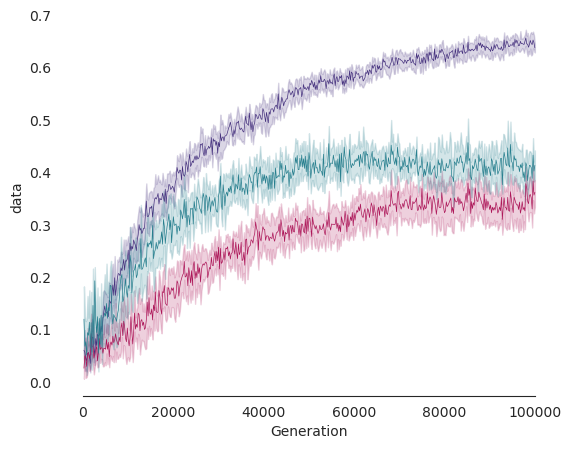

In [16]:
NDB_M0=NDB[NDB["data"]>0]

palette1 = sns.color_palette("viridis")  # /rocket /viridis /flare / cubehelix

palette2 = sns.color_palette("rocket")  # /rocket /viridis /flare / cubehelix

palette = [palette1[0], palette2[2], palette1[2]]
sns.set_style("white")
sns.set_palette(palette)

# Passo 4: Creare il plot
plt.figsize=(40, 40)
g=sns.lineplot(x="Generation", y="data", hue = "distance", data=NDB_M0, linewidth=0.5)

g.set(ylim=(0, None))
g.legend_.remove()

sns.despine(left=True, offset=10, trim=True)
plt.savefig("/path/to/files/plot1.pdf", format="pdf", bbox_inches="tight")

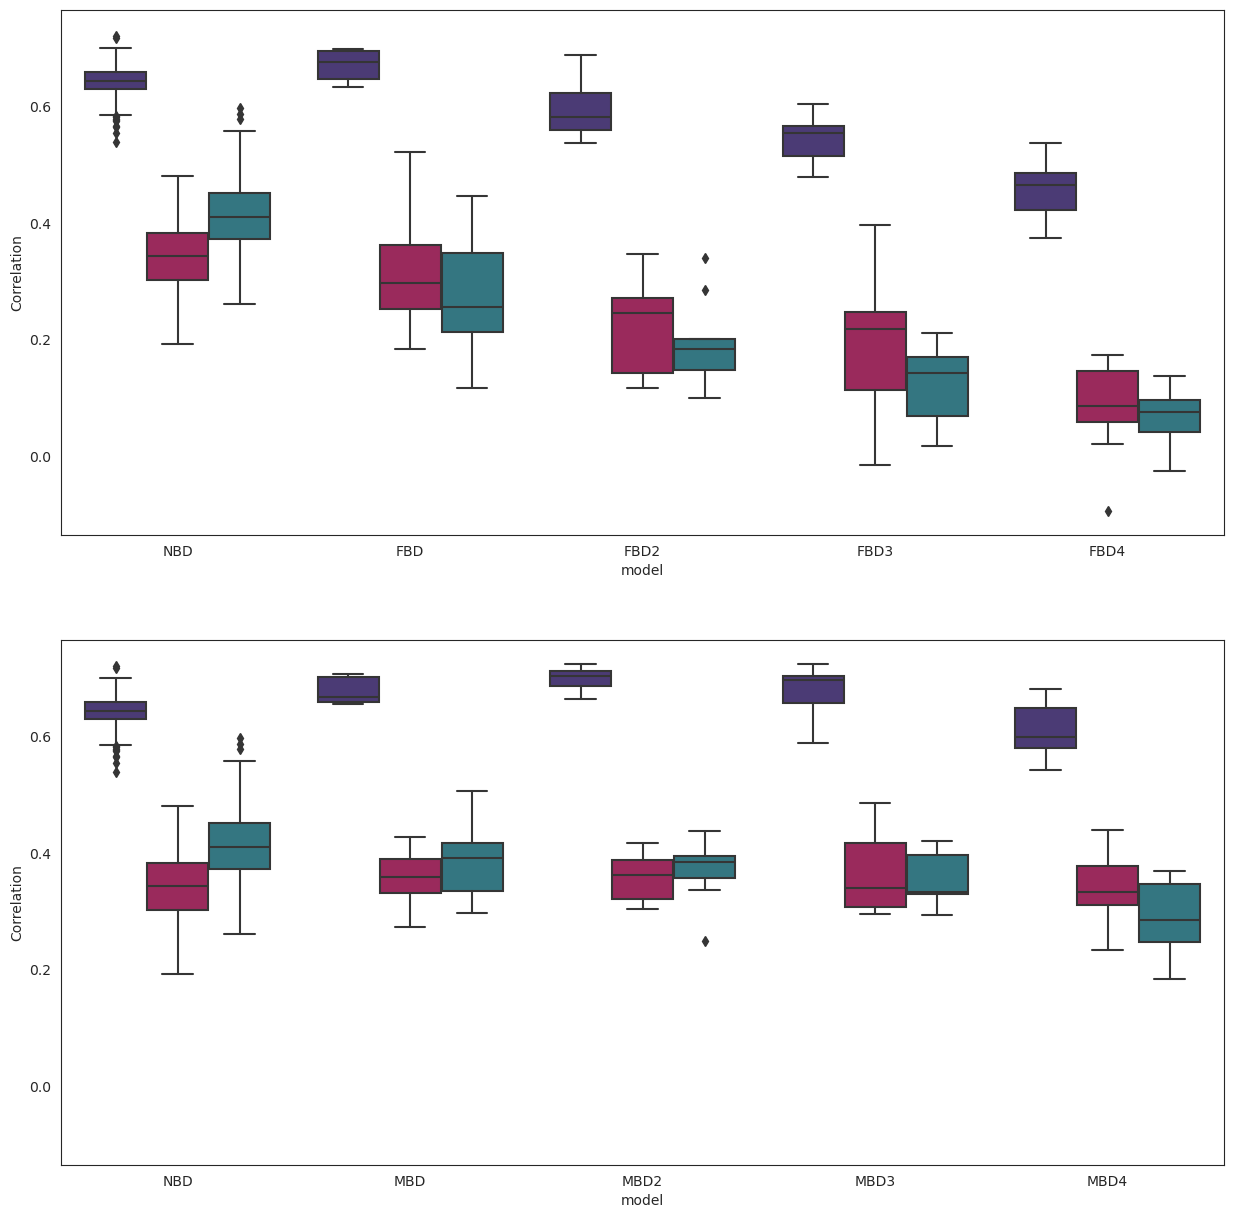

In [37]:
NDB_bp['model'] = 'NBD'
FBD_bp['model'] = 'FBD'
FBD2_bp['model'] = 'FBD2'
FBD3_bp['model'] = 'FBD3'
FBD4_bp['model'] = 'FBD4'
MBD_bp['model'] = 'MBD'
MBD2_bp['model'] = 'MBD2'
MBD3_bp['model'] = 'MBD3'
MBD4_bp['model'] = 'MBD4'


combined_dfFBD = pd.concat([NDB_bp, FBD_bp, FBD_bp, FBD2_bp, FBD3_bp, FBD4_bp], axis=0)
combined_dfMBD = pd.concat([NDB_bp, MBD_bp, MBD_bp, MBD2_bp, MBD3_bp, MBD4_bp], axis=0)

fig, axes = plt.subplots(2, 1, figsize=(15, 15), sharey=True)

palette1 = sns.color_palette("viridis")  # /rocket /viridis /flare / cubehelix
palette2 = sns.color_palette("rocket")  # /rocket /viridis /flare / cubehelix
palette = [palette1[0], palette2[2], palette1[2]]

sns.set_style("white")
g=sns.boxplot(x="model", y="data", hue="distance", data=combined_dfFBD, palette=palette, ax=axes[0])
g1=sns.boxplot(x="model", y="data", hue="distance", data=combined_dfMBD, palette=palette, ax=axes[1])
g.legend_.remove()
g1.legend_.remove()
g.ylim=(0,1)
g1.ylim=(0,1)
g.set_ylabel("Correlation")  
g1.set_ylabel("Correlation") 




plt.savefig("/path/to/files/plotSBD.pdf", format="pdf", bbox_inches="tight")


In [8]:
FBD4_ks = FBD4_bp[FBD4_bp['distance']=='corr_Mitochondrial_Nuclear']
FBD3_ks = FBD3_bp[FBD3_bp['distance']=='corr_Mitochondrial_Nuclear']
FBD2_ks = FBD2_bp[FBD2_bp['distance']=='corr_Mitochondrial_Nuclear']
FBD_ks = FBD_bp[FBD_bp['distance']=='corr_Mitochondrial_Nuclear']

NDB_ks = NDB_bp[NDB_bp['distance']=='corr_Mitochondrial_Nuclear']

MBD_ks = MBD_bp[MBD_bp['distance']=='corr_Mitochondrial_Nuclear']
MBD2_ks = MBD2_bp[MBD2_bp['distance']=='corr_Mitochondrial_Nuclear']
MBD3_ks = MBD3_bp[MBD3_bp['distance']=='corr_Mitochondrial_Nuclear']
MBD4_ks = MBD4_bp[MBD4_bp['distance']=='corr_Mitochondrial_Nuclear']


In [33]:
ks_statistic, p_value = stats.ks_2samp(NDB_ks['data'], MBD3_ks['data'])

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")


KS Statistic: 0.49742857142857144
P-value: 0.042072418673268164
The distributions are significantly different.


In [27]:
#MBD
p_values = [0.1901511561626682, 0.0661171950432018, 0.042072418673268164, 1.2191189753983878e-06]

reject_null, pval_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='bonferroni')

# Risultati
print("Decisione di rifiuto (True per rifiutare l'ipotesi nulla):", reject_null)
print("P-value corretti:", pval_corrected)

Decisione di rifiuto (True per rifiutare l'ipotesi nulla): [False False False  True]
P-value corretti: [7.60604625e-01 2.64468780e-01 1.68289675e-01 4.87647590e-06]


In [32]:
#FBD
p_values = [3.7678807785895066e-05, 7.163686756169863e-10, 1.220311526128004e-15, 6.662719640057504e-21]

reject_null, pval_corrected, _, _ = smm.multipletests(p_values, alpha=0.05, method='bonferroni')

# Risultati
print("Decisione di rifiuto (True per rifiutare l'ipotesi nulla):", reject_null)
print("P-value corretti:", pval_corrected)


Decisione di rifiuto (True per rifiutare l'ipotesi nulla): [ True  True  True  True]
P-value corretti: [1.50715231e-04 2.86547470e-09 4.88124610e-15 2.66508786e-20]


In [8]:
FBD4mean=np.mean(FBD4_ks['data'])
FBD3mean=np.mean(FBD3_ks['data'])
FBD2mean=np.mean(FBD2_ks['data'])
FBDmean=np.mean(FBD_ks['data'])


NBDmean=np.mean(NDB_ks['data'])

MBDmean=np.mean(MBD_ks['data'])
MBD2mean=np.mean(MBD2_ks['data'])
MBD3mean=np.mean(MBD3_ks['data'])
MBD4mean=np.mean(MBD4_ks['data'])

print("NBD=", NBDmean, "MBD=", MBDmean, "MBD2=", MBD2mean, "MBD3=", MBD3mean, "MBD4=", MBD4mean)
print(" ")
print("NBD=", NBDmean, "FBD=", FBDmean, "FBD2=", FBD2mean, "FBD3=", FBD3mean, "FBD4=", FBD4mean)


NBD= 0.4132156441439966 MBD= 0.40141761603207515 MBD2= 0.3644358650743168 MBD3= 0.3269756051339713 MBD4= 0.3011558508291242
 
NBD= 0.4132156441439966 FBD= 0.30398353237036735 FBD2= 0.16112567814258244 FBD3= 0.13255560868751312 FBD4= 0.09176238499931295


# Statistics

In [4]:
listFBD4 = []

for file in all_filesFBD4:
    dfFBD4=pd.read_csv(file, sep="\t",index_col=False)
    listFBD4.append(dfFBD4)

listFBD4 = pd.concat(listFBD4)
listFBD4_filt=listFBD4[listFBD4['Generation']>90000]
np.mean(listFBD4_filt['Mitochondrial'])

26.450447272727274

In [5]:
def process_files(model_prefixes, all_files_dict, generation_threshold=90000):
    dataframes = {}
    
    for prefix in model_prefixes:
        list_df = []
        for file in all_files_dict[prefix]:
            df = pd.read_csv(file, sep="\t", index_col=False)
            list_df.append(df)
        
        concatenated_df = pd.concat(list_df)
        filtered_df = concatenated_df[concatenated_df['Generation'] > generation_threshold]
        dataframes[prefix] = filtered_df
    
    mito_df = pd.concat([dataframes[prefix][['Mitochondrial']].assign(Model=prefix) for prefix in model_prefixes])
    nuclear_df = pd.concat([dataframes[prefix][['Nuclear']].assign(Model=prefix) for prefix in model_prefixes])
    
    return mito_df, nuclear_df

dict_all_files = {
    "FBD4": all_filesFBD4,
    "FBD3": all_filesFBD3,
    "FBD2": all_filesFBD2,
    "FBD": all_filesFBD,
    "NBD": all_filesNDB,
    "MBD": all_filesMBD,
    "MBD2": all_filesMBD2,
    "MBD3": all_filesMBD3,
    "MBD4": all_filesMBD4,
}

mito_df, nuclear_df = process_files(dict_all_files.keys(), dict_all_files)


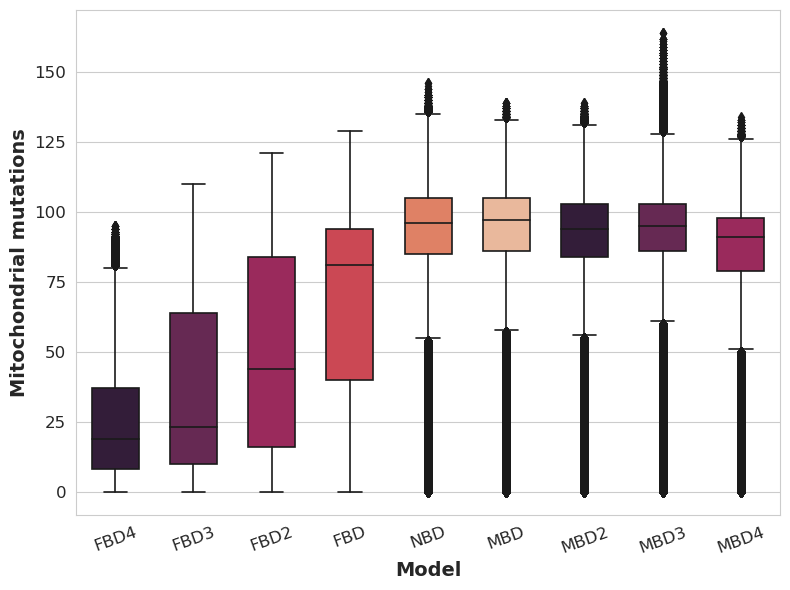

In [9]:
plt.figure(figsize=(8, 6))

sns.set_style("whitegrid")

palette1 = sns.color_palette("viridis")
palette2 = sns.color_palette("rocket")
palette = [palette1[0], palette2[2], palette1[2]]

g = sns.boxplot(
    x="Model",
    y="Mitochondrial",
    data=mito_df,
    palette=palette2,
    linewidth=1.2,  
    width=0.6  
)

plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.ylabel("Mitochondrial mutations", fontsize=14, fontweight="bold")

plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

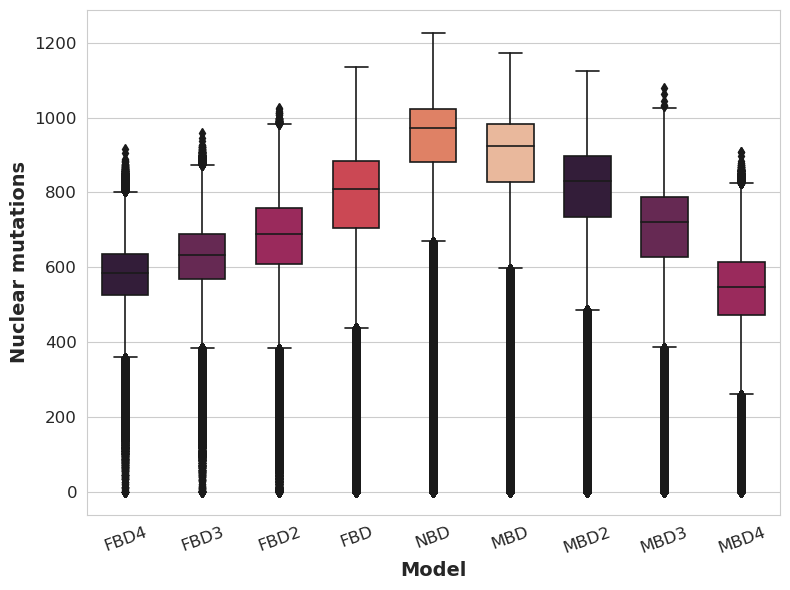

In [10]:
plt.figure(figsize=(8, 6))

sns.set_style("whitegrid")

palette1 = sns.color_palette("viridis")
palette2 = sns.color_palette("rocket")
palette = [palette1[0], palette2[2], palette1[2]]

g = sns.boxplot(
    x="Model",
    y="Nuclear",
    data=nuclear_df,
    palette=palette2,
    linewidth=1.2, 
    width=0.6 
)

plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.ylabel("Nuclear mutations", fontsize=14, fontweight="bold")

plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()